In [24]:
from typing import Callable

In [34]:
def bisection(a: float, b: float, f: Callable[[float], float], tolerance: float = 1e-6, max_iterations: int = 100):
    """
    Approximate the root of a polynomial intitally around (a, b) using the Bisection method

    Prints out the root if found after max_iterations, otherwise prints out an error message

    Positional arguments:

    a - The start of the interval
    
    b - The end of the interval

    f - The function whose root is to be determined

    Keyword arguments:

    tolerance - Desired acurracy (default 1e-6)

    max_iterations - Maximum number of iterations(default 100)
    
    Returns None
    """
    for i in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < tolerance:
            print(f"Found after {i + 1} iteration(s)")
            print(f"Root found at x = {c:.6f}")
            return
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    print("Root not found. Try different intervals or change the number of maximum iterations.")

    
def newton_raphson(x0: float, f: Callable[[float], float], df: Callable[[float], float], tolerance=1e-6, max_iterations=100):
    """Approximate the root of a polynomial that is close to x0 using the Newton-Raphson method

    Prints out the root if found after max_iterations, otherwise prints out an error message

    Returns None

    Positional arguments:

    x0 -- The initial guess

    f -- The function whose root is to be calculated

    df - The derivative of f

    Keyword arguments:
    
    tolerance - Desired acurracy (default 1e-6)

    max_iterations - Maximum number of iterations(default 100)
    """
    for i in range(max_iterations):
        fx = f(x0)
        dfx = df(x0)

        x1 = x0 - (fx / dfx)

        if abs(f(x1) < tolerance):
            print(f"Found after {i + 1} iterations")
            print(f"Value found at x = {x1:.6f}")
            return
        else:
            x0 = x1
    
    print("Root not found. Try different intervals or change the number of maximum iterations.")



In [26]:
def f(x: float):
    return x ** 4 + 2 * (x ** 3) + x ** 2 + 2 * x - 40

def df(x: float):
    return 4 * (x ** 3) + 6 * (x ** 2) + 2 * x + 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np

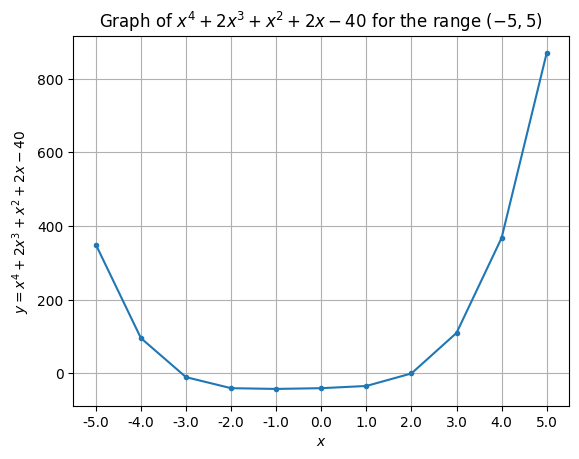

In [17]:

x = np.linspace(-5, 5, 11)
vectorized_f = np.vectorize(f)
y = f(x)

plt.plot(x, y, r".-")
plt.grid(True)
plt.xticks(x, np.round(x, 1))
plt.title("Graph of ${ x^4+ 2x^3 + x^2 + 2x - 40 }$ for the range ${ (-5, 5) }$")
plt.ylabel("${ y = x^4+ 2x^3 + x^2 + 2x - 40 }$")
plt.xlabel("${ x }$")


In [66]:
bisection(1, 3, f)

Found after 0 iterations
Root found at x = 2.000000


In [41]:
newton_raphson(1, f, df)

Value found at x = 2.000000


In [19]:
from timeit import Timer

In [21]:
number_of_executions = 1
newton_raphson_timer = Timer("newton_raphson(1, f, df)", "from __main__ import newton_raphson, f, df")
newton_raphson_time = newton_raphson_timer.timeit(number_of_executions)
print(f"Newton-Raphson: {newton_raphson_time * 1000}ms")

print()

bisection_timer = Timer("bisection(1, 4, f)", "from __main__ import bisection, f")
bisection_time = bisection_timer.timeit(number= number_of_executions)
print(f"Bisection: {bisection_time * 1000}ms")

print()

if bisection_time < newton_raphson_time:
    print("Bisection method performed faster")
else:
    print("Newton-Raphson method performed faster")


Found after 6 iterations
Value found at x = 2.000000
Newton-Raphson: 0.6138999997347128ms

Found after 26 iteration(s)
Root found at x = 2.000000
Bisection: 0.1978999998755171ms

Bisection method performed faster


In [53]:
number_of_executions = 1
newton_raphson_timer = Timer("newton_raphson(-10000, f, df)", "from __main__ import newton_raphson, f, df")
newton_raphson_time = newton_raphson_timer.timeit(number_of_executions)
print(f"Newton-Raphson: {newton_raphson_time * 1000}ms")

print()

bisection_timer = Timer("bisection(-200, 100, f, max_iterations = 10000000)", "from __main__ import bisection, f")
bisection_time = bisection_timer.timeit(number= number_of_executions)
print(f"Bisection: {bisection_time * 1000}ms")

print()

if bisection_time < newton_raphson_time:
    print("Bisection method performed faster")
else:
    print("Newton-Raphson method performed faster")

Found after 33 iterations
Value found at x = -3.156185
Newton-Raphson: 0.9284999978262931ms

Root not found. Try different intervals or change the number of maximum iterations.
Bisection: 50594.50629999992ms

Newton-Raphson method performed faster
